# Klasyfikacja tweetów Elona Muska

### Projekt realizuje grupa:

*  Wiktor Bajor **249459**
*  Adam Kubiak **249480**


### Opis wykonywanego zadania: 

&nbsp; W ramach projektu grupa będzie realizować zadanie klasyfikacji binarnej tweetów Elona Muska. Wykonywane zadanie będzie opierać się o zebranie tweetów sławnych ludzi, takich jak politycy, przedsiębiorcy, sportowcy, celebryci, influencerzy oraz Elon Musk. 
Akwizycja danych będzie realizowana poprzez publiczny interfejs programowania aplikacji (API), udostępniony przez Twitter.  Przy czym możliwa ilość tweetów do pobrania to pięćset tysięcy, co powinno być wystarczającą ilością danych. Dzięki udostępnionemu API można uzyskać dostęp do takich danych jak, treść publikacji, godzina publikacji, lokalizacja, ilość polubień czy ilość retweetów. Po ukończeniu etapu akwizycji danych kolejnym zadaniem, będzie przeanalizowanie tweetów, mając na uwadze takie elementy jak ilość retweetów, ilość polubień, występowanie pewnych słów kluczowych czy też sentyment umieszczonego tekstu. Na podstawie dokonanej analizy zostaną wybrane najbardziej charakterystyczne cechy tweetów Elona Muska. Ostatnim elementem projektu będzie utworzenie i wytrenowanie (na bazie wcześniej wybranych najbardziej istotny cech) klasyfikatora, który będzie oceniał czy dany tweet był napisany przez Elona Muska czy też nie. Wykonana analiza oraz klasyfikator mogłyby zostać wykorzystane do stworzenia cyfrowego sobowtóra Elona Muska. 

### Eksploracyjna analiza danych

#### Pochodzenie danych

Dane pobierane są bezpośrednio z Twittera. Do akwizycji wykorzystane zostało API V2, udostępnione bezpośrednio przez Twitter oraz dedykowana biblioteka Tweepy, która umożliwiła wygodne pobieranie danych z wykorzystaniem języka Python3. 


Zdecydowano się na poddanie analizie kilka publicznych osób o zbliżonej ilości obserwatorów. Do wybrania odpowiednich kont wykorzystano stronę https://www.socialtracker.io/toplists/top-50-twitter-users-by-followers/, na której została zebrana lista 50 najbardziej popularnych kont. W trakcie wyboru kont starano się aby wybrane konta reprezentowały różne części społeczeństwa(politycy, celebryci, przedsiębiorcy, artyści oraz platformy medialne).

Finalnie wybrano:

* Elon Musk - `115,845,432` mln obserwujących
* Barack Obama - `133,313,544` mln obserwujących
* Justin Bieber - `113,794,646` mln obserwujących
* Cristiano Ronaldo - `104,817,226` mln obserwujących
* Narendra Modi - `84,408,428` mln obserwujących
* YouTube - `77,602,328` mln obserwujących
* Ellen DeGeneres - `77,074,929` mln obserwujących
* Twitter - `64,794,610` mln obserwujących
* CNN - `64,098,649` mln obserwujących
* Bill Gates - `61,072,366` mln obserwujących
* Joe Biden - `36,371,140` mln obserwujących


Skrypt realizujący akwizycje tweetów, zawarte jest w pliku `tweets_scraper.ipynb`  

### Opis zmiennych

Api Twittera umożliwia pobranie wielu danych w ramach projektu zdecydowano się na pobranie kolejnych danych:

* `created_at`(string w formacie daty) - jest to data zamieszczenia wpisu z dokładnością co do sekundy, tą informacje można wykorzystać do sprawdzenia aktywności użytkownika w trakcie doby
* `text`(string) - zawartość wpisu
* `source`(string) - źródło publikacji wiadomości, na przykład czy wpis był wykonany z aplikacji z iPhone czy ze strony internetowej
* `possibly sensitive`(bool) - zawiera informacje czy dany wpis zawiera treści wrażliwe
* `lang`(string) - język wpisu
* `sentiment`(float) - sentyment wpisu w skali od -1 do 1 wyliczony z treści wpisu z wykorzystaniem biblioteki `TextBlob`
* `retweet count`(int) - ilość 'podania dalej wpisu'
* `reply count`(int) - ilość odpowiedzi 
* `like count`(int) - ilość polubień wpisu
* `quote count`(int) - ilość cytowań wpisu
* `is Elon Musk`(bool) - identyfikuje czy dany jest wpis jest utworzony przez Elona Muska 


Powyżej została opisana podstawowa część danych. Dane w tabeli występują następująco.




In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

        
def get_data(path="user_data/basic*.csv"):
    all_files = glob.glob(path)
    df_from_each_file = (pd.read_csv(f) for f in all_files)
    return pd.concat(df_from_each_file, ignore_index=True)

data_frame = get_data()
data_frame["created at"] = pd.to_datetime(data_frame["created at"])
data_frame.head(5)

,is Elon Musk,created at,text,source,possibly sensitive,lang,sentiment,retweet count,reply count,like count,quote count
0,False,2022-09-07 01:14:34+00:00,NaN,Twitter Web App,False,zxx,0.0,20161,12246,128558,5670
1,False,2022-07-07 19:33:51+00:00,1 year of preparation 🔥 @FreeFire_NA #GarenaFr...,Twitter for iPhone,False,en,0.0,5088,3657,27770,841
2,False,2022-02-16 03:05:25+00:00,"Go for the Gold, Ladies!!!!!! Cannot wait to w...",Twitter for iPhone,False,en,1.0,5779,6141,60501,778
3,False,2021-12-30 22:33:21+00:00,The countdown begins…,Twitter for iPhone,False,en,0.0,6977,3279,39912,3414
4,False,2021-12-22 00:17:53+00:00,gummy nft @inbetweenersNFT,Twitter Web App,False,en,0.0,4823,4003,32755,836


### Opis zmiennych 

Poza podstawowymi informacjami Twitter umożliwia pobranie gotowych analiz tekstu. Utworzone analizy zawierają, do sześciu różnych analiz. Pięć pierwszych analiz zawiera informacje o dziedzinie wpisu oraz o istocie wpisu. Ostatnia, szósta analiza zawiera prawdopodobieństw trafności analizy, dziedzinę oraz istotę wpisu. Ostatnia analiza nie jest dostępna dla każdego wpisu.     

In [112]:
data_annotations_frame = get_data('user_data/annotations*.csv')
data_annotations_frame["created at"] = pd.to_datetime(data_frame["created at"])
data_annotations_frame.head(5)

,is Elon Musk,context annotations domain 0,context annotations entity 0,context annotations domain 1,context annotations entity 1,context annotations domain 2,context annotations entity 2,context annotations domain 3,context annotations entity 3,context annotations domain 4,context annotations entity 4,context annotations domain 5,context annotations entity 5,annotations,created at
0,False,Brand,Twitter,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,Entities [Entity Service],Services,NaN,2022-09-07 01:14:34+00:00
1,False,Business Taxonomy,Technology Business,Brand,Apple,Brand,Twitter,Unified Twitter Taxonomy,Apple,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,"[0.6128, 'Tweet', 'Other']",2022-07-07 19:33:51+00:00
2,False,Brand,Twitter,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,Entities [Entity Service],Services,"[0.6239, 'Tweet', 'Other']",2022-02-16 03:05:25+00:00
3,False,Brand,Twitter,Product,Twitter Circle,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,"[0.937, 'Twitter Circle', 'Other']",2021-12-30 22:33:21+00:00
4,False,Brand,Twitter,Product,Twitter Circle,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,"[0.8345, 'Twitter Circle', 'Other']",2021-12-22 00:17:53+00:00


### Badanie brakujących zmiennych 

Twitter udostępnia dane, które są kompletne, ciężko znaleźć jakieś braki. 
W niektórych przypadkach brakuje analizy kontekstu wypowiedzi.
Brak ten nie jest istotny z punkt widzenia całego zbiory, ponieważ całkowity brak analizy tekstu występuje tylko dla kilku próbek.
Próbki obarczone tym problemem mogą zostać wykluczone.
Kolejnym elementem, który bywa wybrakowany jest treść wpisu(szczególnie w przypadku Elona Muska). Mimo braku treści wpisu, nadal informacje dostępne są dane o ilości odpowiedzi czy polubień, więc takie dane mogą zostać wykorzystane.

In [116]:
data_annotations_frame = data_annotations_frame[(~data_annotations_frame['context annotations domain 0'].isna() & ~data_annotations_frame['annotations'].isna())]
data_annotations_frame.head(5)

,is Elon Musk,context annotations domain 0,context annotations entity 0,context annotations domain 1,context annotations entity 1,context annotations domain 2,context annotations entity 2,context annotations domain 3,context annotations entity 3,context annotations domain 4,context annotations entity 4,context annotations domain 5,context annotations entity 5,annotations,created at
1,False,Business Taxonomy,Technology Business,Brand,Apple,Brand,Twitter,Unified Twitter Taxonomy,Apple,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,"[0.6128, 'Tweet', 'Other']",2022-07-07 19:33:51+00:00
2,False,Brand,Twitter,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,Entities [Entity Service],Services,"[0.6239, 'Tweet', 'Other']",2022-02-16 03:05:25+00:00
3,False,Brand,Twitter,Product,Twitter Circle,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,"[0.937, 'Twitter Circle', 'Other']",2021-12-30 22:33:21+00:00
4,False,Brand,Twitter,Product,Twitter Circle,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,"[0.8345, 'Twitter Circle', 'Other']",2021-12-22 00:17:53+00:00
8,False,Brand,Twitter,Unified Twitter Taxonomy,Twitter,Unified Twitter Taxonomy,S&P 500,Unified Twitter Taxonomy,Social media,Technology,Social media,Entities [Entity Service],Services,"[0.5757, 'Tweet', 'Other']",2021-12-13 17:33:30+00:00


### Analiza danych numerycznych 

W przypadku dostępnych danym, kilka zmiennych to dane numeryczne:

* `like count`
* `retweet count`
* `quote count`
* `reply count`
* `sentiment`

Żeby lepiej przyjrzeć się danym numerycznym, wykorzystano podstawowe własności.

#### Średnia

Analizując wartości średnie liczby polubień, odpowiedzi, cytowań czy podawania dalej można zauważyć, że 
każda wartości poza średnim sentymentem jest kilkukrotnie wyższa. Można zauważyć iż największa różnica bo
aż dziesięciokrotna jest w średniej liczbie odpowiedzi na wpis. Co może świadczyć o tym iż wpisy Elona Muska bardziej 
angażują społeczność.

In [72]:
numeric_columns = ["like count","retweet count", 'quote count', 'reply count', 'sentiment']
data_frame.groupby(by='is Elon Musk')[numeric_columns].mean()

,like count,retweet count,quote count,reply count,sentiment
is Elon Musk,,,,,
False,45514.020492,5369.442623,844.729650,1807.858677,0.163179
True,269519.377652,23034.874116,4276.217822,18107.452617,0.110288


#### Mediana

Porównując mediane wpisów Elona Muska do pozostałych użytkowników, można zauważyć iż w przypadku wpisów
Elona Muska mediany są bardziej zbliżone do średnich niż w przypadku pozostałych użytkowników. 
Szczególnie widać to przy ilości cytowań. Takie zachowanie może wynikać z faktu, że Elon ma bardziej stałą grupę
odbiorców, natomiast w przypadku innych reakcje mogą bardziej wynikać ze szczególnych zdarzeń.   


In [73]:
data_frame.groupby(by='is Elon Musk')[numeric_columns].median()

,like count,retweet count,quote count,reply count,sentiment
is Elon Musk,,,,,
False,8506.0,1514.0,92.0,454.0,0.027758
True,150914.0,10264.0,1251.0,9290.0,0.000000


#### Sentyment

W obu przypadkach zarówno średniej jak i medianie wartości sentymentu wpisu są podobne. Wpisy neutralne. 

#### Ilość wpisów w zależności od pory dnia


Sprawdzono ilość wpisów w zależności od godziny na przestrzeni doby.
W celu przeanalizowania tej zależności utworzono histogram wpisów w zależności od godziny.
Histogram został zamieszczony poniżej. Analizując histogram można zauważyć bardzo ciekawą zależność 
Elon Musk jest dużo bardziej aktywny od pozostałych użytkowników między 0 a 8. 
W pozostałych godzinach Elon jest mniej aktywny od pozostałych użytkowników.  


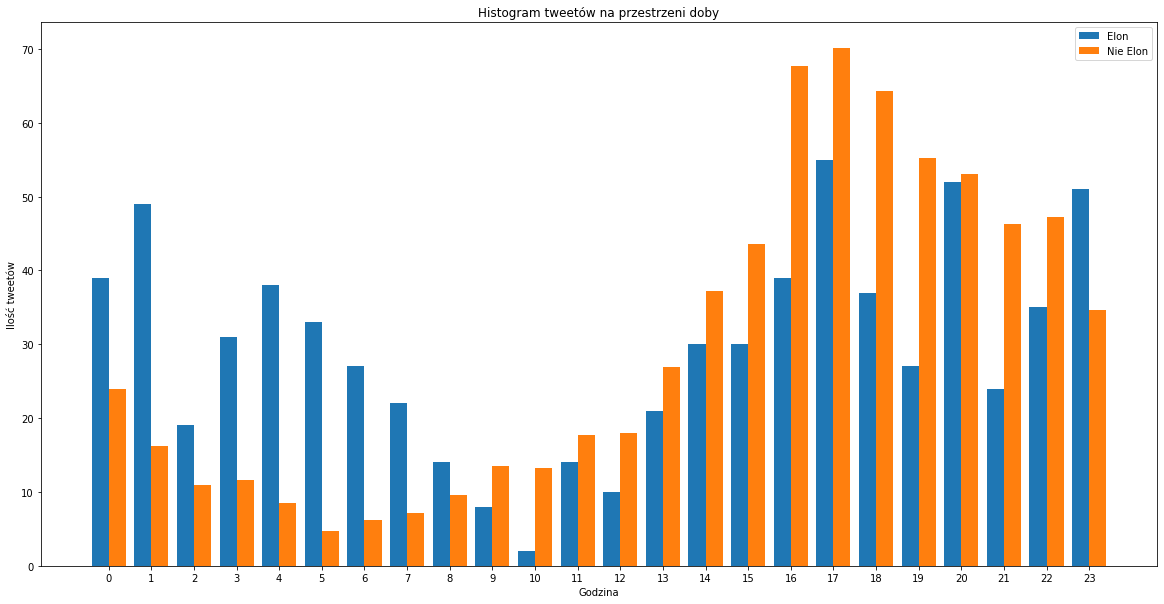

In [128]:
data_frame_elon = data_frame.loc[data_frame['is Elon Musk'] == True] 
data_frame_not_elon = data_frame.loc[data_frame['is Elon Musk'] == False] 
data_frame_not_elon_count_by_hour = data_frame_not_elon['created at'].groupby(data_frame_not_elon['created at'].dt.hour).count() / 10
elon_data_count_by_hour = data_frame_elon['created at'].groupby(data_frame_elon['created at'].dt.hour).count()

def fill_missing_hours_with_zero(data_count_by_hour_dict):
    for i in range(24):
        if i not in data_count_by_hour_dict:
            data_count_by_hour_dict[i] = 0
    
    data_count_by_hour_list = list(dict(sorted(data_count_by_hour_dict.items())).values())
    return np.array(data_count_by_hour_list).astype(float)

data_count_by_hour = fill_missing_hours_with_zero(data_frame_not_elon_count_by_hour.to_dict())

def plot_histogram_of_tweet_during_time(elon_data_count_by_hour, not_elon_data_count_by_hour, y_label, title):
    bar_width = 0.4
    hours = np.arange(24)
    plt.figure(figsize=(20, 10))
    plt.bar(hours - bar_width/2, elon_data_count_by_hour.values, width=bar_width, label='Elon')
    plt.bar(hours + bar_width/2, not_elon_data_count_by_hour, width=0.4, label='Nie Elon')

    plt.xticks(hours, hours)
    plt.xlabel("Godzina")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

plot_histogram_of_tweet_during_time(elon_data_count_by_hour, data_count_by_hour, 'Ilość tweetów', 'Histogram tweetów na przestrzeni doby')

### Analiza sentymentu w ciągu dnia

Analizując sentyment wpisów na przestrzeni doby. Można zaobserwować iż wpisy Elona Muska były wyjątkowe pozytywne 
o godzinie 10 oraz 12. W tylko w tych godzinach sentyment wpisów Elona Muska znacząco przewyższa średni sentyment
pozostałych użytkowników.     

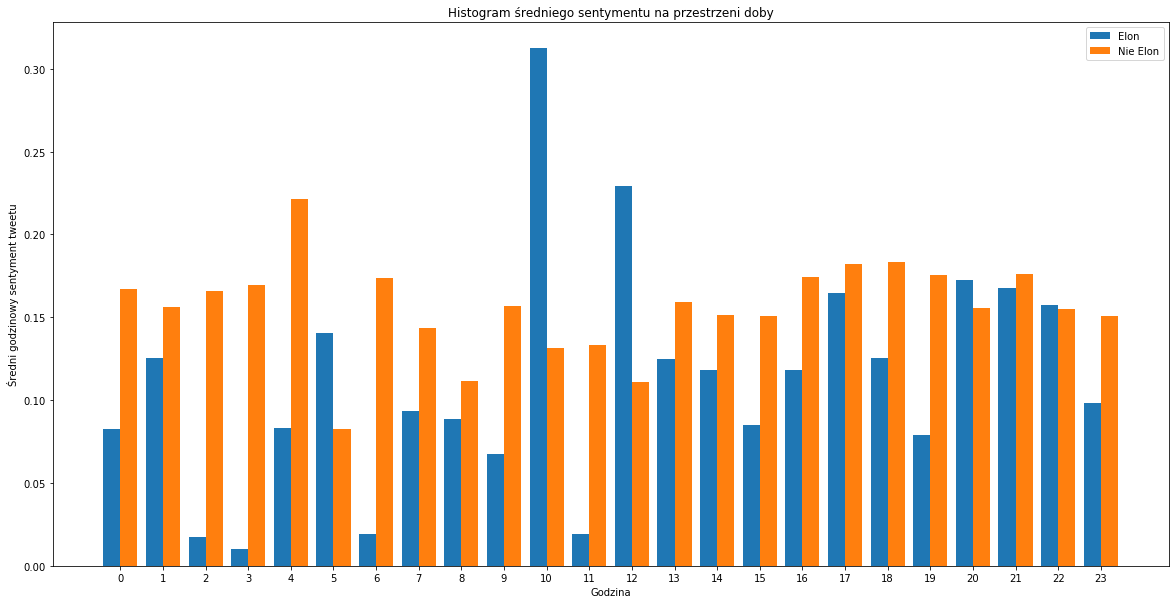

In [127]:
elon_sentiment = data_frame_elon.groupby(data_frame_elon['created at'].dt.hour).describe()['sentiment']['mean']
not_elon_sentiment = data_frame_not_elon.groupby(data_frame_not_elon['created at'].dt.hour).describe()['sentiment']['mean']

data_count_by_hour = fill_missing_hours_with_zero(not_elon_sentiment.to_dict())
plot_histogram_of_tweet_during_time(elon_sentiment, data_count_by_hour, 'Średni godzinowy sentyment tweetu', 'Histogram średniego sentymentu na przestrzeni doby')


### Analiza danych nienumerycznych

#### Źródło wpisu
Analizując zmienne nienumeryczne można zaobserwować ciekawe zależności. Rozważając źródło dodania wpisu można zauważyć, 
że Elon Musk zawsze dodaje wpisy z aplikacji mobilnej na IPhone. Pozostali użytkownicy dodawali wpisy z różnych źródeł.

In [96]:
data_frame.groupby(by='is Elon Musk')['source'].value_counts()

is Elon Musk  source                  
False         Twitter Web App             1997
              Twitter for iPhone          1552
              Twitter Media Studio        1304
              SocialFlow                   805
              Sprout Social                648
              Sprinklr                     581
              Twitter Web Client           164
              swonkie                       12
              Twitter for Advertisers.       4
              TweetDeck                      3
              Twitter Ads                    2
              Instagram                      1
              Periscope                      1
              Twitter for  iPhone            1
              Twitter for Android            1
True          Twitter for iPhone           707
Name: source, dtype: int64

##### Język wpisu

Analizując języki wpisu, widać iż w obu przypadkach dominuje język angielski. Wpisy Elona Muska w zauważalnej części,
nie mają językowej zawartości(wpis jest pusty), takie wpisy to około 10% całej aktywności. Podobne zjawisko nie zachodzi
w przypadku pozostałych użytkowników. 

In [120]:
data_frame.groupby(by='is Elon Musk')['lang'].value_counts()

is Elon Musk  lang
False         en      6259
              und      180
              hi       127
              pt       112
              zxx       70
              it        62
              es        49
              gu        43
              kn        23
              art       20
              pa        14
              fr        12
              qst       12
              ta        10
              te         8
              in         7
              ml         7
              qme        7
              et         6
              tl         6
              ja         5
              de         4
              mr         4
              or         4
              cy         3
              iw         3
              tr         3
              bn         2
              ht         2
              qht        2
              ro         2
              ca         1
              fa         1
              lt         1
              ne         1
              nl         1
         

### Reszta potencjalnych analiz

In [1]:
data_frame_not_elon.groupby(data_frame_not_elon['created at'].dt.hour).boxplot(column='sentiment', subplots=False, figsize=(30,10))
data_frame_elon.groupby(data_frame_elon['created at'].dt.hour).boxplot(column='sentiment', subplots=False, figsize=(30,10))
data_frame_not_elon.groupby(data_frame_not_elon['created at'].dt.hour).boxplot(column='like count', subplots=False, figsize=(30,10))
data_frame_elon.groupby(data_frame_elon['created at'].dt.hour).boxplot(column='like count', subplots=False, figsize=(30,10))

NameError: name 'data_frame_not_elon' is not defined

In [131]:
data_frame_annotations = get_data("user_data/annotations*.csv")
data_frame_annotations["created at"] = pd.to_datetime(data_frame["created at"])

data_frame_annotations_elon = data_frame_annotations.loc[data_frame_annotations['is Elon Musk'] == True] 
data_frame_annotations_not_elon = data_frame_annotations.loc[data_frame_annotations['is Elon Musk'] == False] 

In [132]:
print(data_frame_annotations_elon['context annotations domain 0'].value_counts())
print('\n\n')
print(data_frame_annotations_elon['context annotations entity 0'].value_counts())

print('\n\n\n')

print(data_frame_annotations_not_elon['context annotations domain 0'].value_counts())
print('\n\n')
print(data_frame_annotations_not_elon['context annotations entity 0'].value_counts())


Person                            370
Business Taxonomy                 238
Entities [Entity Service]          26
Unified Twitter Taxonomy           21
Video Game                         12
Interests and Hobbies               7
Events [Entity Service]             6
Brand                               6
TV Shows                            5
Brand Vertical                      5
Interests and Hobbies Category      2
Ongoing News Story                  2
Multimedia Franchise                1
Podcast                             1
Interests and Hobbies Vertical      1
Movie                               1
Political Body                      1
Cities                              1
Name: context annotations domain 0, dtype: int64



Elon Musk                                                       364
Financial Services Business                                     230
Aerospace                                                        17
Starlink: Battle for Atlas                                  

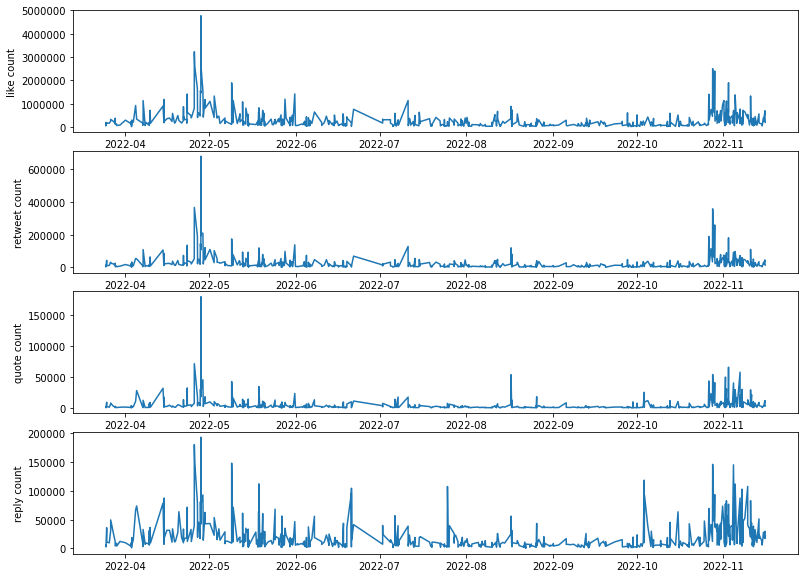

In [133]:
ylabels = ["like count","retweet count", 'quote count', 'reply count']

def plot_charts(data_frame, ylabels):
    fig = plt.figure(figsize=(13,10))
    fig.subplots_adjust(hspace=0.15,wspace=0.01)

    n_row = len(ylabels)
    n_col = 1
    for count, ylabel in enumerate(ylabels):
        ax = fig.add_subplot(n_row, n_col, count+1)
        ax.plot(data_frame["created at"].to_numpy(dtype='datetime64'), data_frame[ylabel].to_numpy())
        ax.set_ylabel(ylabel)

plot_charts(data_frame_elon, ylabels)